<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/HW5/linear_regression_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan
> 11/19/23

> Project 5 (Extra Credit)


### Description
> In this notebook, I recreate the Linear Regression Python notebook and translate it into R. I then add additional models at the end and add a summary of the new things I discovered from recreating this notebook

# 1. Convert the entire Linear Regression Python notebook to R and redo all the data analysis steps (in R): https://github.com/bforoura/IDS/blob/main/linear_regression_Python.ipynb

# **Supervised Learning: Linear Regression**

In [430]:
library(readr)

# Company_data contains amounts spent on different types of advertisements and the resulting Sales
companyDF <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv", show_col_types = FALSE)

In [431]:
#pd.set_option('display.max_rows', None)

print(head(companyDF, 10))

# A tibble: 10 × 4
      TV Radio Newspaper Sales
   <dbl> <dbl>     <dbl> <dbl>
 1 230.   37.8      69.2  22.1
 2  44.5  39.3      45.1  10.4
 3  17.2  45.9      69.3  12  
 4 152.   41.3      58.5  16.5
 5 181.   10.8      58.4  17.9
 6   8.7  48.9      75     7.2
 7  57.5  32.8      23.5  11.8
 8 120.   19.6      11.6  13.2
 9   8.6   2.1       1     4.8
10 200.    2.6      21.2  15.6


In [432]:
summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

## **Examine Correlations**

In [433]:
# Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales

corr_matrix <- cor(companyDF)

sales_corr <- corr_matrix["Sales", ]
sales_corr <- sort(sales_corr, decreasing=TRUE)

print(sales_corr)


    Sales        TV     Radio Newspaper 
1.0000000 0.9012079 0.3496311 0.1579600 


## **Examine Features with Boxplots**

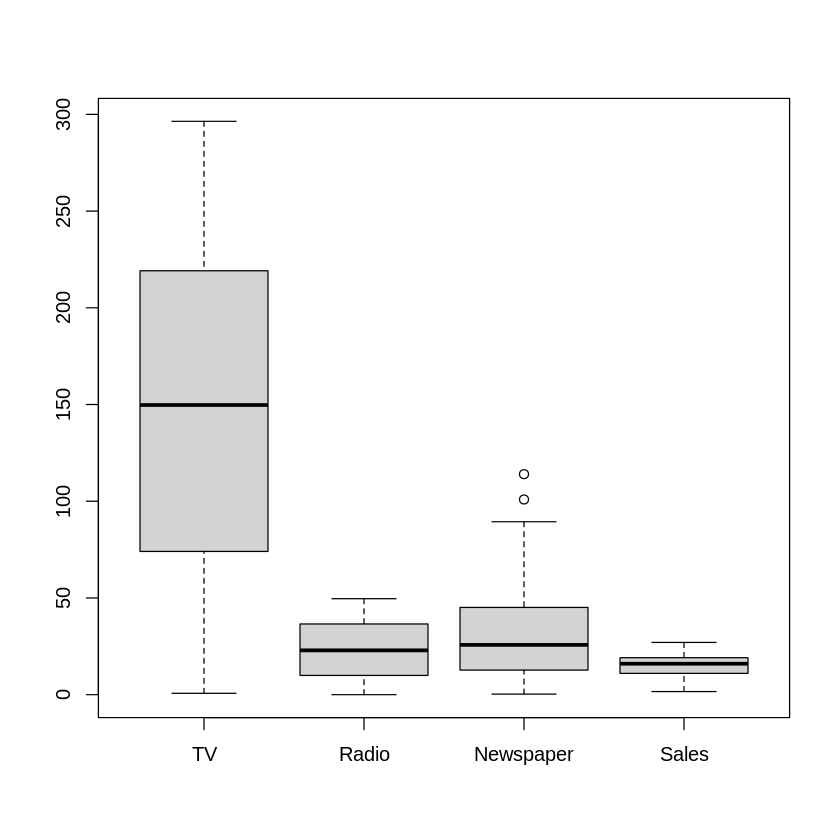

In [434]:
boxplot(companyDF)

## **Examine Feature Distributions**

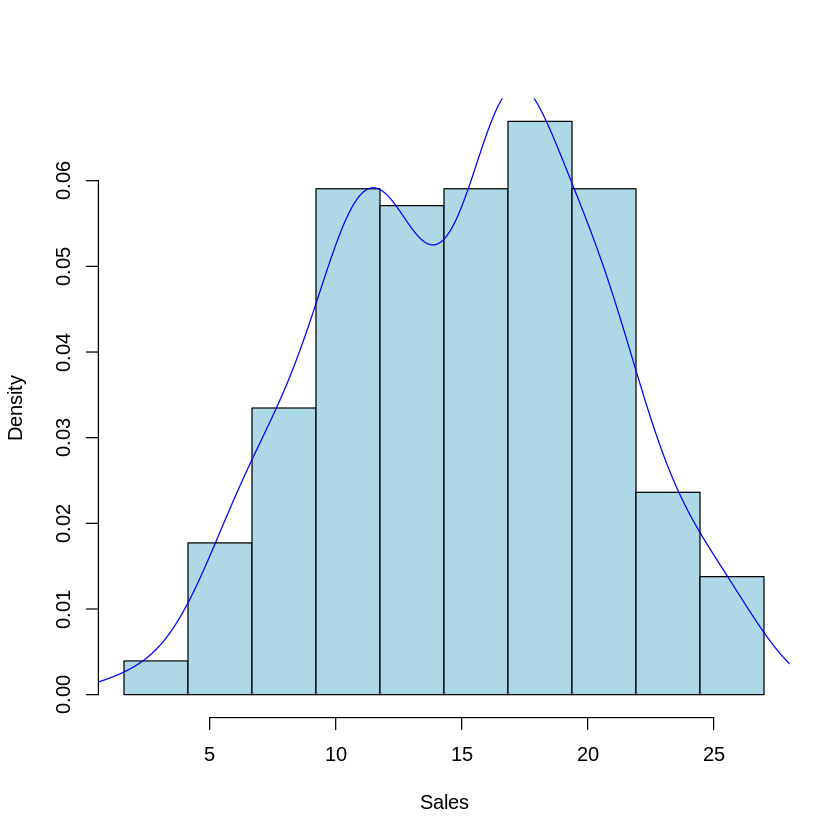

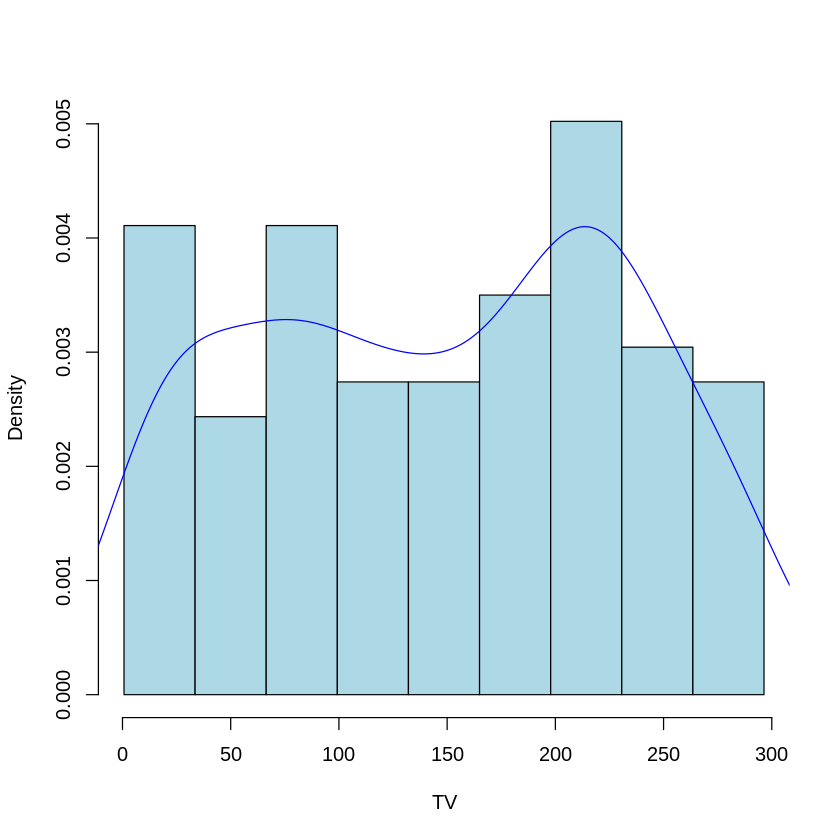

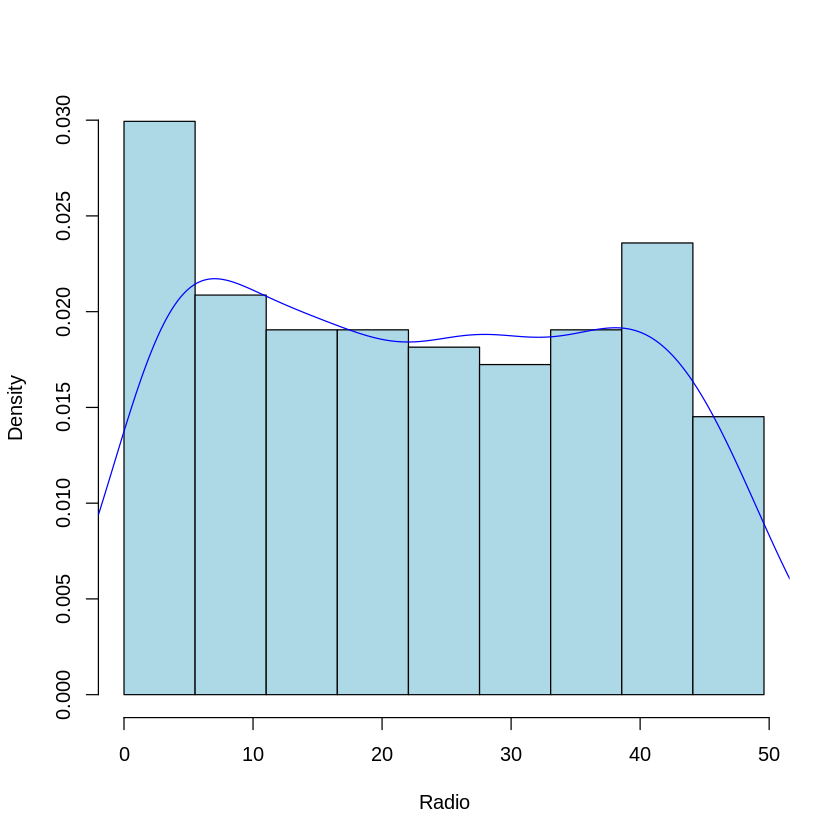

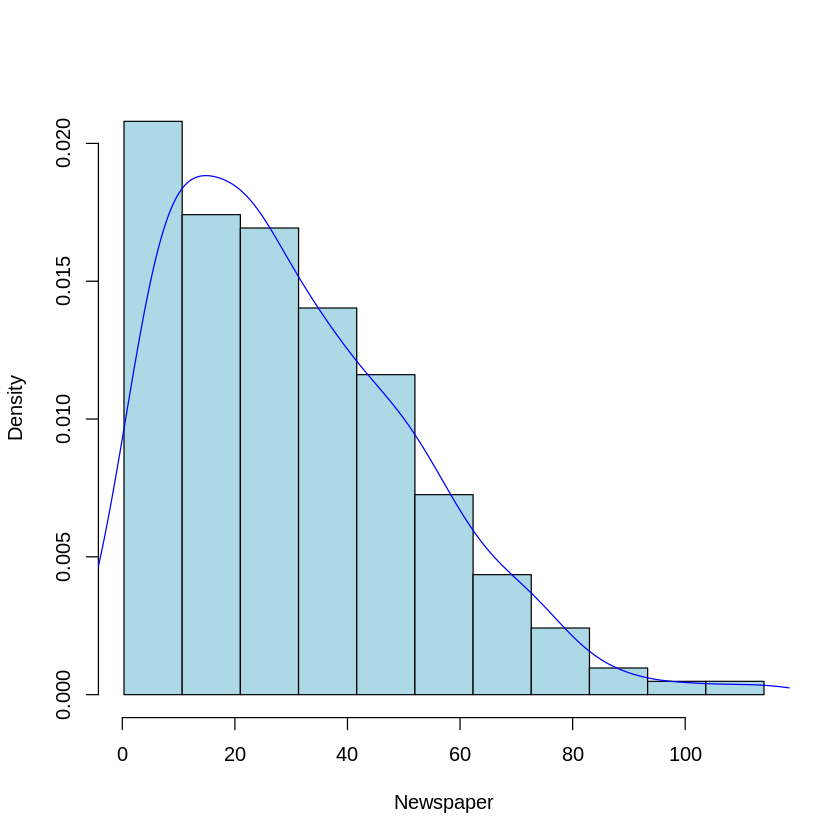

In [435]:
# plotting histogram and  kernel density estimates

hist(companyDF$Sales, breaks=seq(min(companyDF$Sales), max(companyDF$Sales), length.out=11), prob=TRUE, col="lightblue", xlab="Sales", main="")
lines(density(companyDF$Sales), col = "blue")

hist(companyDF$TV, breaks = seq(min(companyDF$TV), max(companyDF$TV), length.out=10), prob=TRUE, col="lightblue", xlab="TV", main="")
lines(density(companyDF$TV), col = "blue")

hist(companyDF$Radio, breaks = seq(min(companyDF$Radio), max(companyDF$Radio), length.out=10), prob=TRUE, col="lightblue", xlab="Radio", main="")
lines(density(companyDF$Radio), col = "blue")

hist(companyDF$Newspaper, breaks=seq(min(companyDF$Newspaper), max(companyDF$Newspaper), length.out=12), prob=TRUE, col="lightblue", xlab="Newspaper", main="")
lines(density(companyDF$Newspaper), col = "blue")

## **Check for Missing Values**
- Determine if there are any missing values
- If so, decide on the method of imputation, e.g., mean, median, most_frequent

In [436]:
sum(is.na(companyDF))

[1] 0

## **Bulid the Linear Regression Model**
- y = f(x), where
> y (dependent parameter) = Sales

  > x (independent parameter) = TV, Radio, or NewsPaper

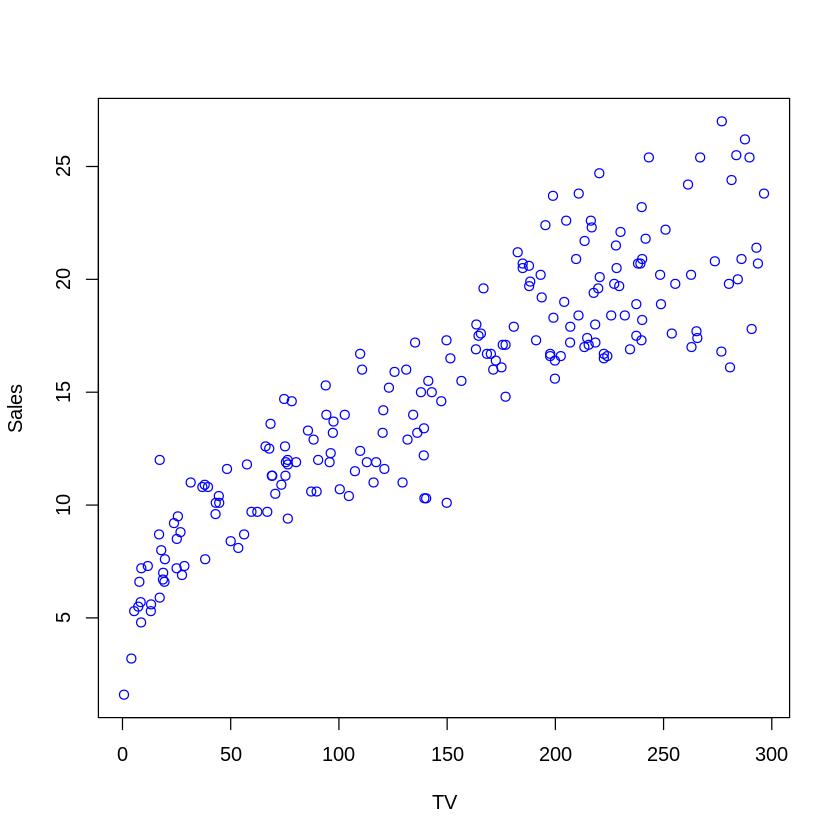

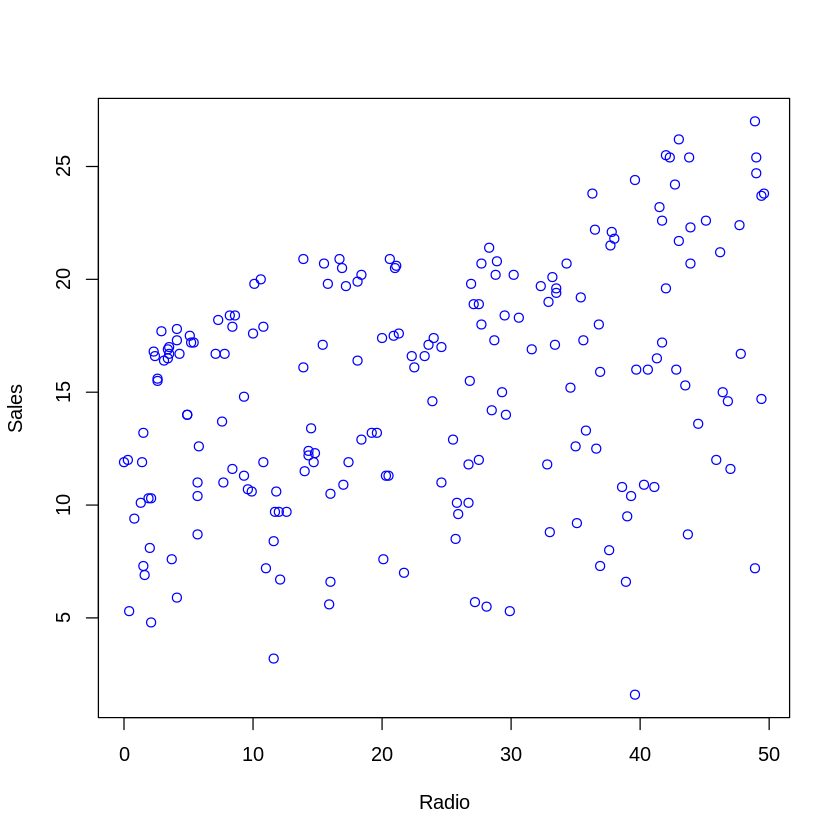

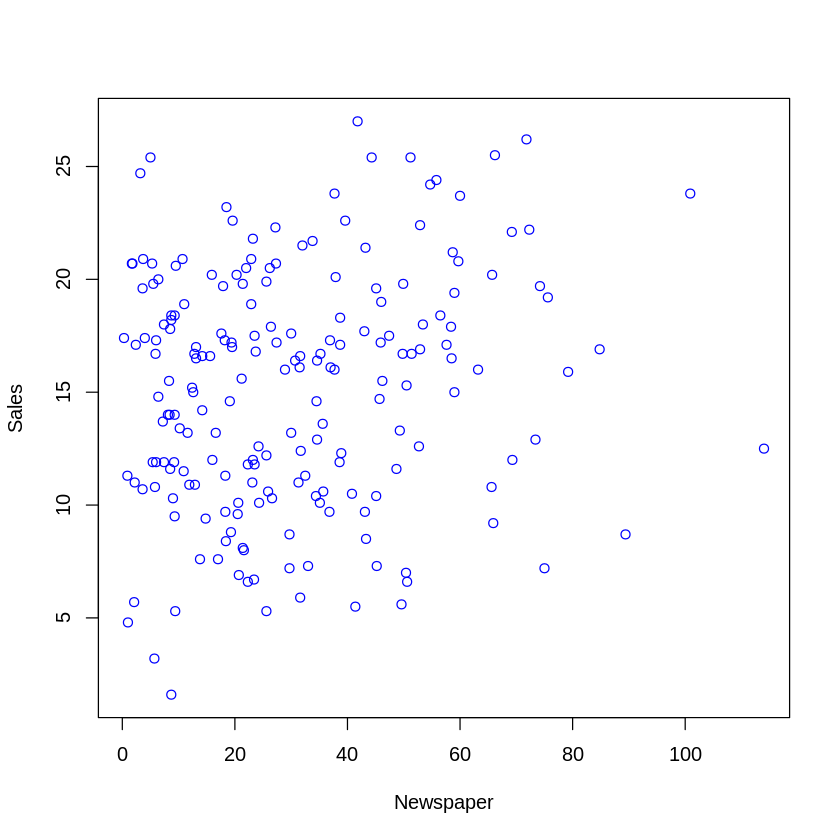

In [437]:
# Here the target variable is the Sales column

plot(companyDF$TV, companyDF$Sales, xlab="TV", ylab="Sales", col="blue")

plot(companyDF$Radio, companyDF$Sales, xlab="Radio", ylab="Sales", col="blue")

plot(companyDF$Newspaper, companyDF$Sales, xlab="Newspaper", ylab="Sales", col="blue")


## **Use the Entire Data Set for Training**

In [438]:
x <- matrix(companyDF$TV, ncol = 1)
y <- matrix(companyDF$Sales, ncol = 1)

# create the model
linear_model <- lm(y ~ x, data = companyDF)

#x <- companyDF$TV
#y <- companyDF$Sales

# intercept and slope values
cat("Intercept:", coef(linear_model)[1], "\n")
cat("Slope:", coef(linear_model)[2])

Intercept: 6.974821 
Slope: 0.05546477

In [439]:

# Let's make predictions on the data and evaluate the model using the R² and MSE values

#R2 is a statistic that will give some information about the goodness of fit of a model.
#In regression, the R2 coefficient of determination is a statistical measure of how well
#the regression predictions approximate the real data points. An R2 of 1 indicates that
#the regression predictions perfectly fit the data.


# make predictions using the entire data set
y_pred <- predict(linear_model, newdata = companyDF)

cat('R2 score:',            summary(linear_model)$r.squared, "\n")
cat('Mean squared error:', mean((y - y_pred)^2))

R2 score: 0.8121757 
Mean squared error: 5.217744

### **Linear Model**: Sales = 6.97 + 0.05 * TV

## **Split the Data into Training and Test Cases**

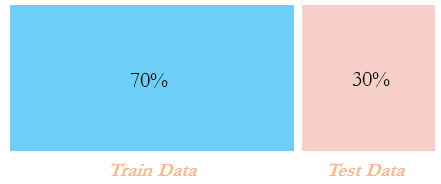

In [440]:
# Let's experiment again, but this time split the data into training and testing sets

# set.seed controls the shuffling of input data and allows us to reproduce the
# same results each time

set.seed(100)

# Generate random indices for splitting
indices <- sample(1:length(x), size = 0.7 * length(x))

# Create training and testing sets
x_train <- x[indices]
y_train <- y[indices]
x_test <- x[-indices]
y_test <- y[-indices]

In [441]:
# 70% of 200 cases are used for training now
x_train <- matrix(x_train, ncol = 1)
dim(x_train)

[1] 140   1

In [442]:
# 30% of 200 cases are set aside for testing
x_test <- matrix(x_test, ncol = 1)
dim(x_test)

[1] 60  1

In [443]:
# create the model
# fit a new model on the reduced training data
lm2 <- lm(y_train ~ x_train)

#The values for intercept and slope are slightly different on the reshaped data here.
#I am wondering if the calculation in R is different because I couldn't find a way to make it equal to the python one.
cat("Intercept:", coef(lm2)[1], "\n")
cat("Slope:", coef(lm2)[2])

Intercept: 7.167843 
Slope: 0.05406196

## **Linear Model:** Sales = 6.95 + 0.05 * TV

In [444]:
# make predictions using the testing set
y_test_pred <- predict(lm2, data = x_test)

#I also had an issue here that I could not fix. The R2 score is at least close but the MSE is way off.
cat('R2 score:',            summary(lm2)$r.squared, "\n")
cat('Mean squared error:', mean((y_test - y_test_pred)^2))

R2 score: 0.807109 


Warning message in y_test - y_test_pred:
“longer object length is not a multiple of shorter object length”


Mean squared error: 57.06015

## **Summary**

* Model trained and tested on the entire data set of 200 cases:
> **Sales = 6.97 + 0.05 * TV**    

* Model trained on 70% of the data and tested on 30% of the data:
> **Sales = 6.95 + 0.05 * TV**



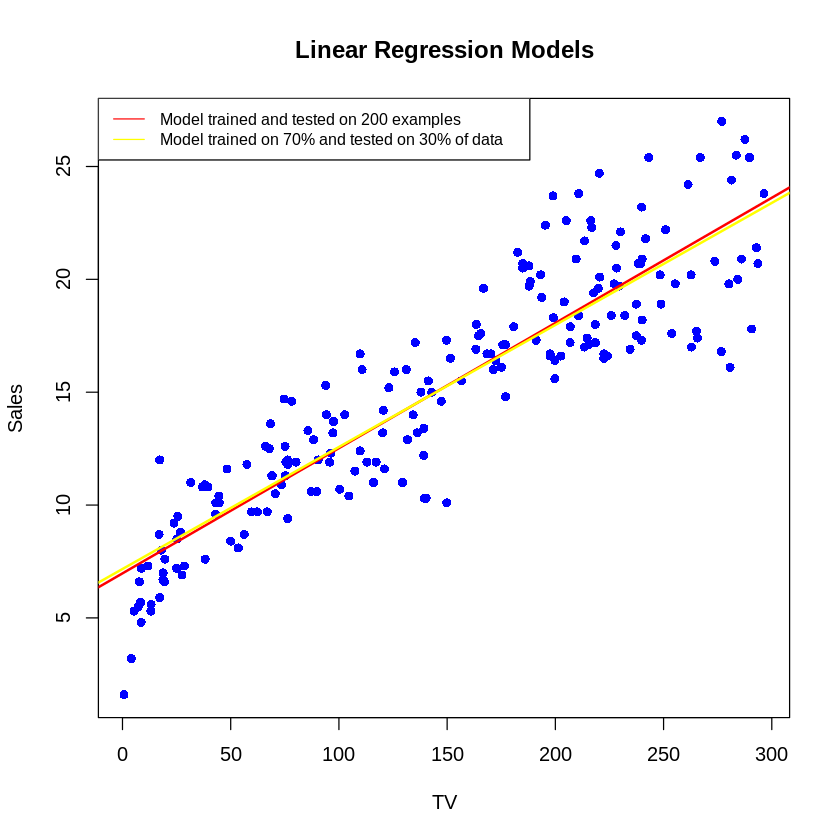

In [445]:
# plot the best fit linear models
plot(companyDF$TV, companyDF$Sales, col = "blue", pch = 16, xlab = "TV", ylab = "Sales", main = "Linear Regression Models")

#Original
abline(linear_model, col = "red", lwd = 2)

#Trained/tested
abline(lm2, col = "yellow", lwd = 2)

legend("topleft", legend = c("Model trained and tested on 200 examples", "Model trained on 70% and tested on 30% of data"), col = c("red", "yellow"), lty = 1, cex = 0.8)

# **Resources**
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols
* https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4
* https://github.com/bforoura/IDS/blob/main/linear_regression_Python.ipynb

# 2. Recall the dataset contains amounts spent on different types of advertisements and the resulting Sales. Build the following linear models and plot the obtained MSE and R2 values for each model
a. Sales vs. TV (above)<br>
b. Sales vs. (TV, Radio, Newspaper)

## Sales vs. Radio
- I put it all in 1 code block and removed the comments to conserve space and make it easier to copy and paste

Intercept: 12.23572 
Slope: 0.1244317R2 score: 0.1222419 
Mean squared error: 24.38405 


[1] 140   1

[1] 60  1

Intercept: 12.61886 
Slope: 0.1156223 
R2 score: 0.1041719 


Warning message in y_test - y_test_pred:
“longer object length is not a multiple of shorter object length”


Mean squared error: 33.19547

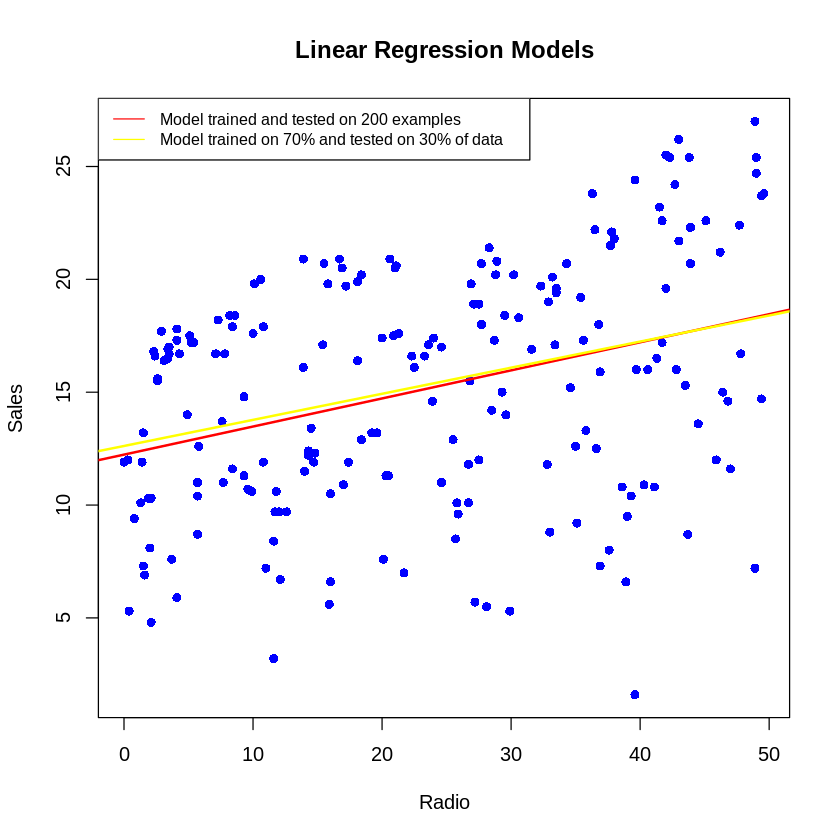

In [446]:
x <- matrix(companyDF$Radio, ncol = 1)
y <- matrix(companyDF$Sales, ncol = 1)

linear_model <- lm(y ~ x, data = companyDF)

cat("Intercept:", coef(linear_model)[1], "\n")
cat("Slope:", coef(linear_model)[2])




y_pred <- predict(linear_model, newdata = companyDF)

cat('R2 score:',            summary(linear_model)$r.squared, "\n")
cat('Mean squared error:', mean((y - y_pred)^2), "\n")




set.seed(100)

indices <- sample(1:length(x), size = 0.7 * length(x))

x_train <- x[indices]
y_train <- y[indices]
x_test <- x[-indices]
y_test <- y[-indices]




x_train <- matrix(x_train, ncol = 1)
dim(x_train)

x_test <- matrix(x_test, ncol = 1)
dim(x_test)





lm2 <- lm(y_train ~ x_train)

cat("Intercept:", coef(lm2)[1], "\n")
cat("Slope:", coef(lm2)[2], "\n")




y_test_pred <- predict(lm2, data = x_test)

cat('R2 score:',            summary(lm2)$r.squared, "\n")
cat('Mean squared error:', mean((y_test - y_test_pred)^2))





plot(companyDF$Radio, companyDF$Sales, col = "blue", pch = 16, xlab = "Radio", ylab = "Sales", main = "Linear Regression Models")

abline(linear_model, col = "red", lwd = 2)

abline(lm2, col = "yellow", lwd = 2)

legend("topleft", legend = c("Model trained and tested on 200 examples", "Model trained on 70% and tested on 30% of data"), col = c("red", "yellow"), lty = 1, cex = 0.8)

## Sales vs. Newspaper

Intercept: 13.95955 
Slope: 0.038324R2 score: 0.02495137 
Mean squared error: 27.08677 


[1] 140   1

[1] 60  1

Intercept: 13.99398 
Slope: 0.0443873 
R2 score: 0.03297865 


Warning message in y_test - y_test_pred:
“longer object length is not a multiple of shorter object length”


Mean squared error: 32.68066

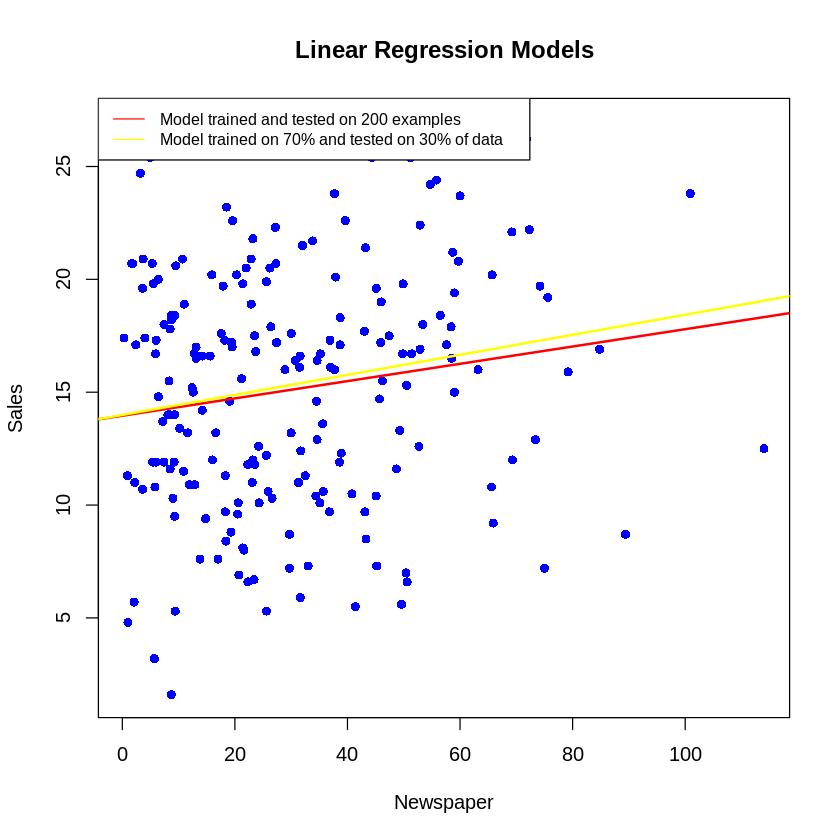

In [447]:
x <- matrix(companyDF$Newspaper, ncol = 1)
y <- matrix(companyDF$Sales, ncol = 1)

linear_model <- lm(y ~ x, data = companyDF)

cat("Intercept:", coef(linear_model)[1], "\n")
cat("Slope:", coef(linear_model)[2])




y_pred <- predict(linear_model, newdata = companyDF)

cat('R2 score:',            summary(linear_model)$r.squared, "\n")
cat('Mean squared error:', mean((y - y_pred)^2), "\n")




set.seed(100)

indices <- sample(1:length(x), size = 0.7 * length(x))

x_train <- x[indices]
y_train <- y[indices]
x_test <- x[-indices]
y_test <- y[-indices]




x_train <- matrix(x_train, ncol = 1)
dim(x_train)

x_test <- matrix(x_test, ncol = 1)
dim(x_test)





lm2 <- lm(y_train ~ x_train)

cat("Intercept:", coef(lm2)[1], "\n")
cat("Slope:", coef(lm2)[2], "\n")




y_test_pred <- predict(lm2, data = x_test)

cat('R2 score:',            summary(lm2)$r.squared, "\n")
cat('Mean squared error:', mean((y_test - y_test_pred)^2))





plot(companyDF$Newspaper, companyDF$Sales, col = "blue", pch = 16, xlab = "Newspaper", ylab = "Sales", main = "Linear Regression Models")

abline(linear_model, col = "red", lwd = 2)

abline(lm2, col = "yellow", lwd = 2)

legend("topleft", legend = c("Model trained and tested on 200 examples", "Model trained on 70% and tested on 30% of data"), col = c("red", "yellow"), lty = 1, cex = 0.8)

# 3. Summarize your findings.
- Making linear regression models seems to be more difficult in R than in Python
- I ran into a bunch of issues translating the code and was able to resolve most of them up until the end
- When trying to use the new train/test sets, I was running into the issue of the calculations being off
- I think the problem could have been when I was creating those sets or when I was making or shaping the linear models
- There is no shape function in R and there is no direct one for fit either
- The trained data is probably the lease accurate for Sales vs. Newspaper. You can visibly see the lines spread towards the end of the plot
- Radio and newspaper are much weaker than TV with sales as the y variable
- The testing for Sales vs. TV is also the most accurate compared to the other two